#Sentiment Analysis Inference using Pretrained BERT Model

*italicized text*

In [1]:
pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [1]:
from transformers import pipeline



In [2]:
unmasker = pipeline(task='fill-mask', model='bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
unmasker('This is a [MASK] car.')


[{'score': 0.07382655888795853,
  'token': 2047,
  'token_str': 'new',
  'sequence': 'this is a new car.'},
 {'score': 0.05252409726381302,
  'token': 3835,
  'token_str': 'nice',
  'sequence': 'this is a nice car.'},
 {'score': 0.04461149498820305,
  'token': 4438,
  'token_str': 'classic',
  'sequence': 'this is a classic car.'},
 {'score': 0.037506792694330215,
  'token': 2998,
  'token_str': 'sports',
  'sequence': 'this is a sports car.'},
 {'score': 0.034782685339450836,
  'token': 4145,
  'token_str': 'concept',
  'sequence': 'this is a concept car.'}]

In [4]:
sentiment_analysis = pipeline(task='sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:

sentences = [
    'The movie was worse.',
    'It was a bad experience at the amusement park.',
    'The food was delicious.',
    'The movie was boring.',
    'The movie was okay.',
    'The movie was amazing.',
    'he is good person. ',
    'he is not good person.'
]

In [16]:
sentiment_analysis(sentences)


[{'label': 'NEGATIVE', 'score': 0.999797523021698},
 {'label': 'NEGATIVE', 'score': 0.9997939467430115},
 {'label': 'POSITIVE', 'score': 0.9998812675476074},
 {'label': 'NEGATIVE', 'score': 0.9997908473014832},
 {'label': 'POSITIVE', 'score': 0.9998013377189636},
 {'label': 'POSITIVE', 'score': 0.9998829364776611},
 {'label': 'POSITIVE', 'score': 0.9998613595962524},
 {'label': 'NEGATIVE', 'score': 0.9996942281723022}]

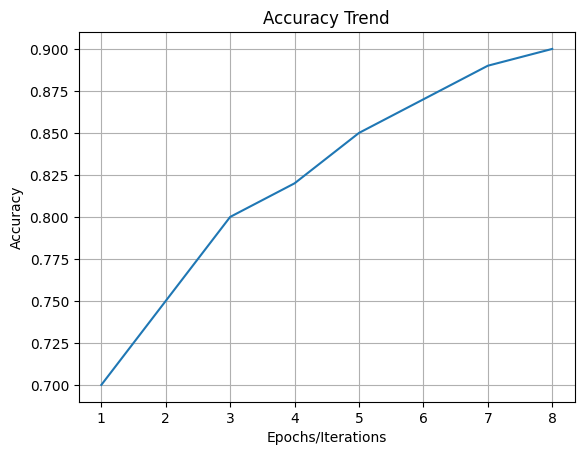

In [18]:
# prompt: plot accuracy graph  as linear

import matplotlib.pyplot as plt

# Assuming you have a list of accuracy values
accuracy_values = [0.7, 0.75, 0.8, 0.82, 0.85, 0.87, 0.89, 0.9]  # Replace with your actual accuracy values

# Create x-axis values (epochs or iterations)
epochs = range(1, len(accuracy_values) + 1)

# Plot the accuracy graph
plt.plot(epochs, accuracy_values)
plt.xlabel('Epochs/Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.grid(True)
plt.show()
